In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:

train = pd.read_csv('UNSW_NB15_training-set.csv', header='infer', low_memory=False)
test = pd.read_csv('UNSW_NB15_testing-set.csv', header='infer', low_memory=False)


In [3]:
train.head(5)
train.describe()

list(train)

['id',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

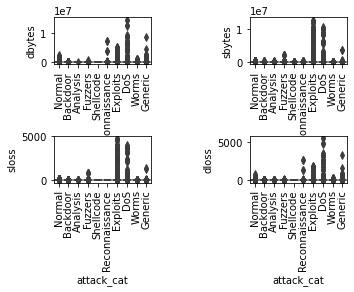

In [21]:
fig, axs = plt.subplots(2, 2)
fn = ["dbytes", "sbytes", "sloss", "dloss"]
cn = train.attack_cat.unique()
#plt.figure(figsize=(60,60))
plot1 = sns.boxplot(x = 'attack_cat', y = 'dbytes', data = train, order = cn, ax = axs[0,0]);
plot2 = sns.boxplot(x = 'attack_cat', y = 'sbytes', data = train, order = cn, ax = axs[0,1]);
plot3 = sns.boxplot(x = 'attack_cat', y = 'sloss', data = train, order = cn, ax = axs[1,0]);
plot4 = sns.boxplot(x = 'attack_cat', y = 'dloss', data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=4.0);
plt.setp(plot1.get_xticklabels(), rotation=90)
plt.setp(plot2.get_xticklabels(), rotation=90)
plt.setp(plot3.get_xticklabels(), rotation=90)
plt.setp(plot4.get_xticklabels(), rotation=90)

In [ ]:
sns.pairplot(train, hue="attack_cat", height = 2, palette = 'colorblind');

In [ ]:
corrmat = train.corr()
plt.figure(figsize=(60,32))
sns.heatmap(corrmat, annot = True, square = True);

In [98]:
X_train = train[[ "sbytes", "sloss", "ct_srv_dst", "ct_dst_sport_ltm", "ct_src_dport_ltm"]]
y_train = train.attack_cat
X_test = test[[ "sbytes", "sloss", "ct_srv_dst", "ct_dst_sport_ltm", "ct_src_dport_ltm"]]
y_test = test.attack_cat

In [107]:
mod_dt = DecisionTreeClassifier(max_depth = 8, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.755


In [105]:
mod_dt.feature_importances_

array([0.31397994, 0.07512672, 0.0965408 , 0.51191567, 0.00243686])

C:\Users\ttaylor\Anaconda3\envs\CSC-723\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


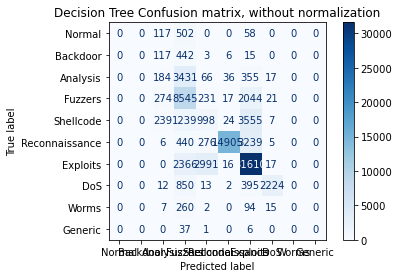

In [106]:
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');